## Telco Customer Churn
### Univariate & Bivariate Analysis

**Objective**
- Analyze relationships between customer attributes and churn to identify high-risk segments and potential churn drivers.


### 1. Loading libraries and data

In [1]:
# loading libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import missingno as msno

import warnings
warnings.filterwarnings("ignore")

In [2]:
# loading data

df = pd.read_csv("../1_dataset/raw_data/WA_Fn-UseC_-Telco-Customer-Churn.csv")

### 2. Quick-look

In [4]:
# on data overview we mentioned we need to check TotalCharges, so now we need to fix dtype for quick analysis

df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors = "coerce")

In [6]:
# fix SeniorCitizen to boolean since categorical is more useful

df["SeniorCitizen"] = df["SeniorCitizen"].map({0: "No", 1: "Yes"})
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [10]:
numeric_cols = ["tenure", "MonthlyCharges", "TotalCharges"]
df[numeric_cols].describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,2283.300441
std,24.559481,30.090047,2266.771362
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3794.737500
max,72.000000,118.750000,8684.800000


### 3. Univariate & Bivariate Analysis

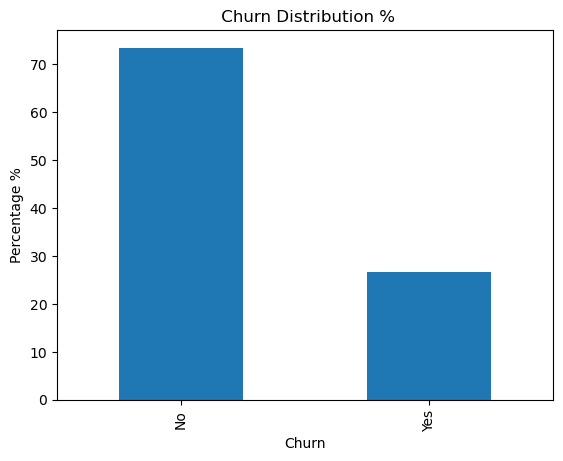

In [12]:
# lets understand Churn distribution

churns = df["Churn"].value_counts(normalize = True) * 100

churns.plot(kind = "bar")
plt.title(" Churn Distribution %")
plt.ylabel("Percentage %")
plt.show()

- Churn affects a significant minority of customers.
- Even small reductions in churn would have meaningful revenue impact.

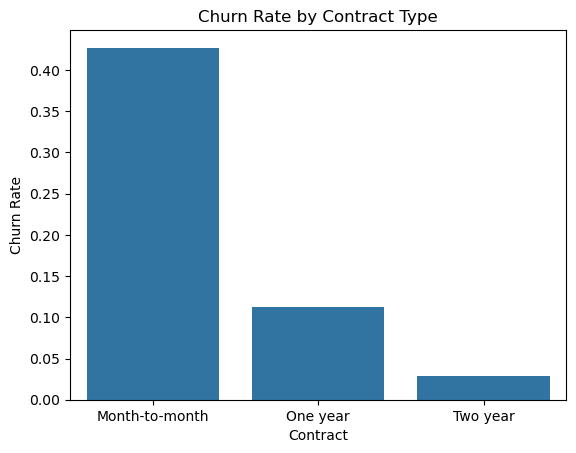

In [15]:
# lets see impact of Contract Type on Churn

contract_churn = (
    df.groupby("Contract")["Churn"]
    .value_counts(normalize = True)
    .rename("churn_rate")
    .reset_index()
)

contract_churn = contract_churn[contract_churn["Churn"] == "Yes"]

sns.barplot(data = contract_churn, x = "Contract", y = "churn_rate")
plt.title("Churn Rate by Contract Type")
plt.ylabel("Churn Rate")
plt.show()

- Month-to-month contracts show substantially higher churn.
- Longer contracts act as a natural retention mechanism.